In [1]:
import librosa;
audio_file_path = 'UrbanSound8K/audio/fold9/13579-2-0-2.wav';
librosa_audio_data,librosa_sample_rate = librosa.load(audio_file_path)

In [2]:
print(librosa_audio_data);

[ 0.00273446  0.01231675  0.02005178 ... -0.00360166 -0.00023695
 -0.00376598]


In [3]:
print(librosa_sample_rate)

22050


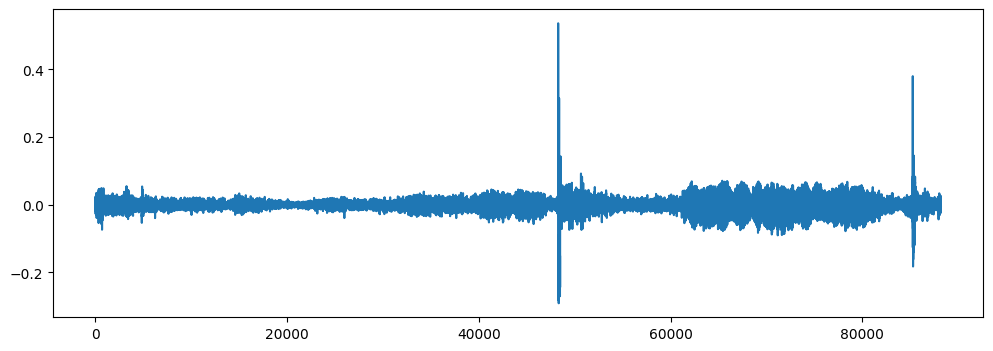

In [4]:
import matplotlib.pyplot as plt;
plt.figure(figsize=(12,4))
plt.plot(librosa_audio_data)

In [5]:
from scipy.io import wavfile as wav
wave_sample_rate,wave_audio = wav.read(audio_file_path) 

In [6]:
wave_audio

array([[ 493, -330],
       [ 654, -163],
       [ 822,  -10],
       ...,
       [ 235, -293],
       [ 165, -362],
       [  46, -479]], dtype=int16)

In [7]:
wave_sample_rate

44100

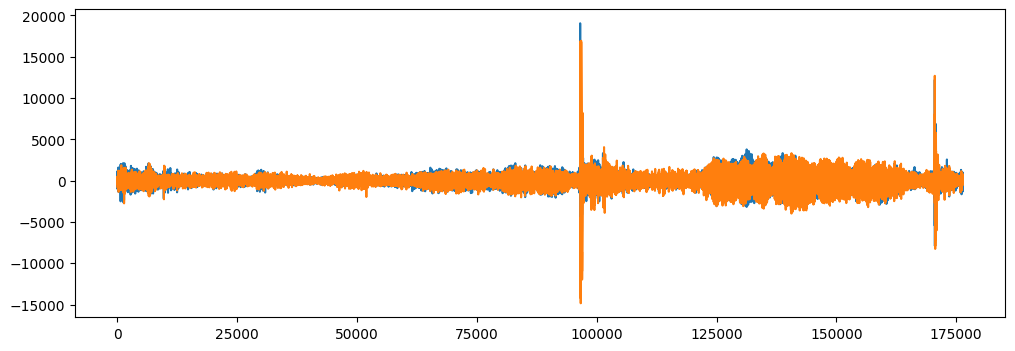

In [8]:
plt.figure(figsize=(12,4))
plt.plot(wave_audio)

Extract Features
Here we will be using Mel-Frequency Cepstral Coefficients(MFCC) from the audio samples. The MFCC summarises the frequency distribution across the window size, so it is possible to analyse both the frequency and time characteristics of the sound. These audio representations will allow us to identify features for classification.

In [9]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data,sr=librosa_sample_rate,n_mfcc=40)
print(mfccs.shape)

(40, 173)


In [46]:
mfccs

array([[-3.37999512e+02, -2.89648682e+02, -2.86800690e+02, ...,
        -2.86172516e+02, -3.05373871e+02, -3.07959564e+02],
       [ 1.54892365e+02,  1.37677597e+02,  1.13492401e+02, ...,
         1.21502106e+02,  1.13388062e+02,  1.04026215e+02],
       [-6.09872665e+01, -4.05197296e+01, -2.08231544e+01, ...,
        -2.62228279e+01, -3.46868973e+01, -3.97963524e+01],
       ...,
       [-3.32354498e+00, -6.08613253e-01, -4.51388168e+00, ...,
         3.02692592e-01, -2.26040435e+00,  3.95859748e-01],
       [-1.85602486e+00,  1.71648145e-01, -1.25463283e+00, ...,
         7.52247751e-01,  3.41613054e+00,  1.05045900e+01],
       [ 5.77883148e+00,  2.14422250e+00, -7.67953396e-02, ...,
         3.97279191e+00, -1.85944676e-01,  2.32343292e+00]], dtype=float32)

In [10]:
import pandas as pd;
import os;
import librosa;

audio_dataset_path ='UrbanSound8K/audio/'
metadata = pd.read_csv('UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [11]:
def feature_extractor(file):
    audio,sample_rate = librosa.load(file_name,res_type='kaiser_fast')
    mfccs_features = librosa.feature.mfcc(y=audio,sr=sample_rate,n_mfcc=40)
    mfcc_scaled_features = np.mean(mfccs_features.T,axis=0)

    return mfcc_scaled_features

In [12]:
import os
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=feature_extractor(file_name)
    extracted_features.append([data,final_class_labels])
    

3554it [04:15, 16.85it/s]/Users/samidhachari/Documents/pythonProject/myenv/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
8326it [09:08, 28.35it/s]/Users/samidhachari/Documents/pythonProject/myenv/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
/Users/samidhachari/Documents/pythonProject/myenv/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(
8732it [09:31, 15.27it/s]


In [13]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-217.35526, 70.22339, -130.38527, -53.282898,...",dog_bark
1,"[-424.09818, 109.34077, -52.919525, 60.86475, ...",children_playing
2,"[-458.79114, 121.38419, -46.520657, 52.00812, ...",children_playing
3,"[-413.89984, 101.66371, -35.42945, 53.036358, ...",children_playing
4,"[-446.60352, 113.68541, -52.402218, 60.302044,...",children_playing


In [14]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [15]:
X.shape

(8732, 40)

In [16]:
y

array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

In [17]:
### Label Encoding
y=np.array(pd.get_dummies(y))
### Label Encoder
# from tensorflow.keras.utils import to_categorical
# from sklearn.preprocessing import LabelEncoder
# labelencoder=LabelEncoder()
# y=to_categorical(labelencoder.fit_transform(y))

In [18]:
y.shape

(8732, 10)

In [19]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [20]:
X_train.shape

(6985, 40)

In [21]:
X_test.shape

(1747, 40)

In [22]:
y_train.shape

(6985, 10)

In [23]:
y_test.shape

(1747, 10)

Model Creation

In [24]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [26]:
num_labels = y.shape[1] # no of classes

In [ ]:
Dense()

In [27]:
model = Sequential()
# first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
# second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
#third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4100      
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               20200     
                                                                 
 activation_1 (Activation)   (None, 200)               0         
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               2

In [29]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [30]:
# train the model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
209/219 [===========================>..] - ETA: 0s - loss: 10.4094 - accuracy: 0.1246
Epoch 1: val_loss improved from inf to 2.28732, saving model to saved_models/audio_classification.hdf5
219/219 [==============================] - 1s 2ms/step - loss: 10.0999 - accuracy: 0.1263 - val_loss: 2.2873 - val_accuracy: 0.1276
Epoch 2/100
106/219 [=============>................] - ETA: 0s - loss: 2.6039 - accuracy: 0.1341

/Users/samidhachari/Documents/pythonProject/myenv/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


186/219 [========================>.....] - ETA: 0s - loss: 2.5423 - accuracy: 0.1294
Epoch 2: val_loss improved from 2.28732 to 2.27528, saving model to saved_models/audio_classification.hdf5
219/219 [==============================] - 0s 2ms/step - loss: 2.5208 - accuracy: 0.1263 - val_loss: 2.2753 - val_accuracy: 0.1145
Epoch 3/100
200/219 [==========================>...] - ETA: 0s - loss: 2.2947 - accuracy: 0.1423
Epoch 3: val_loss improved from 2.27528 to 2.18889, saving model to saved_models/audio_classification.hdf5
219/219 [==============================] - 0s 2ms/step - loss: 2.2978 - accuracy: 0.1437 - val_loss: 2.1889 - val_accuracy: 0.1774
Epoch 4/100
196/219 [=========================>....] - ETA: 0s - loss: 2.2314 - accuracy: 0.1779
Epoch 4: val_loss improved from 2.18889 to 2.13766, saving model to saved_models/audio_classification.hdf5
219/219 [==============================] - 0s 2ms/step - loss: 2.2286 - accuracy: 0.1771 - val_loss: 2.1377 - val_accuracy: 0.1843
Epoch 5

In [31]:
# train the model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
202/219 [==========================>...] - ETA: 0s - loss: 0.9993 - accuracy: 0.6666
Epoch 1: val_loss improved from inf to 0.80046, saving model to saved_models/audio_classification.hdf5
219/219 [==============================] - 0s 2ms/step - loss: 0.9962 - accuracy: 0.6670 - val_loss: 0.8005 - val_accuracy: 0.7504
Epoch 2/100
178/219 [=======================>......] - ETA: 0s - loss: 0.9477 - accuracy: 0.6908
Epoch 2: val_loss improved from 0.80046 to 0.79440, saving model to saved_models/audio_classification.hdf5
219/219 [==============================] - 0s 1ms/step - loss: 0.9560 - accuracy: 0.6875 - val_loss: 0.7944 - val_accuracy: 0.7510
Epoch 3/100
184/219 [========================>.....] - ETA: 0s - loss: 0.9998 - accuracy: 0.6693
Epoch 3: val_loss did not improve from 0.79440
219/219 [==============================] - 0s 1ms/step - loss: 1.0005 - accuracy: 0.6699 - val_loss: 0.8117 - val_accuracy: 0.7481
Epoch 4/100
202/219 [==========================>...] - ETA:

In [32]:
# train the model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
204/219 [==========================>...] - ETA: 0s - loss: 0.9020 - accuracy: 0.7065
Epoch 1: val_loss improved from inf to 0.72497, saving model to saved_models/audio_classification.hdf5
219/219 [==============================] - 0s 2ms/step - loss: 0.9018 - accuracy: 0.7062 - val_loss: 0.7250 - val_accuracy: 0.7796
Epoch 2/100
138/219 [=================>............] - ETA: 0s - loss: 0.8907 - accuracy: 0.7092

/Users/samidhachari/Documents/pythonProject/myenv/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


184/219 [========================>.....] - ETA: 0s - loss: 0.8929 - accuracy: 0.7087
Epoch 2: val_loss improved from 0.72497 to 0.71645, saving model to saved_models/audio_classification.hdf5
219/219 [==============================] - 0s 1ms/step - loss: 0.8848 - accuracy: 0.7110 - val_loss: 0.7165 - val_accuracy: 0.7773
Epoch 3/100
194/219 [=========================>....] - ETA: 0s - loss: 0.8889 - accuracy: 0.7167
Epoch 3: val_loss did not improve from 0.71645
219/219 [==============================] - 0s 2ms/step - loss: 0.8900 - accuracy: 0.7150 - val_loss: 0.7260 - val_accuracy: 0.7750
Epoch 4/100
188/219 [========================>.....] - ETA: 0s - loss: 0.8867 - accuracy: 0.7136
Epoch 4: val_loss did not improve from 0.71645
219/219 [==============================] - 0s 2ms/step - loss: 0.8920 - accuracy: 0.7118 - val_loss: 0.7250 - val_accuracy: 0.7728
Epoch 5/100
181/219 [=======================>......] - ETA: 0s - loss: 0.8716 - accuracy: 0.7170
Epoch 5: val_loss improved fro

In [33]:
# train the model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
209/219 [===========================>..] - ETA: 0s - loss: 0.8529 - accuracy: 0.7295
Epoch 1: val_loss improved from inf to 0.67471, saving model to saved_models/audio_classification.hdf5
219/219 [==============================] - 0s 2ms/step - loss: 0.8544 - accuracy: 0.7288 - val_loss: 0.6747 - val_accuracy: 0.7951
Epoch 2/100
133/219 [=================>............] - ETA: 0s - loss: 0.8439 - accuracy: 0.7289

/Users/samidhachari/Documents/pythonProject/myenv/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


179/219 [=======================>......] - ETA: 0s - loss: 0.8411 - accuracy: 0.7273
Epoch 2: val_loss did not improve from 0.67471
219/219 [==============================] - 0s 1ms/step - loss: 0.8418 - accuracy: 0.7263 - val_loss: 0.6845 - val_accuracy: 0.7905
Epoch 3/100
210/219 [===========================>..] - ETA: 0s - loss: 0.8543 - accuracy: 0.7266
Epoch 3: val_loss improved from 0.67471 to 0.66407, saving model to saved_models/audio_classification.hdf5
219/219 [==============================] - 0s 2ms/step - loss: 0.8510 - accuracy: 0.7278 - val_loss: 0.6641 - val_accuracy: 0.7899
Epoch 4/100
178/219 [=======================>......] - ETA: 0s - loss: 0.8218 - accuracy: 0.7416
Epoch 4: val_loss did not improve from 0.66407
219/219 [==============================] - 0s 1ms/step - loss: 0.8312 - accuracy: 0.7369 - val_loss: 0.6901 - val_accuracy: 0.7974
Epoch 5/100
183/219 [========================>.....] - ETA: 0s - loss: 0.8432 - accuracy: 0.7287
Epoch 5: val_loss improved fro

In [34]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.7962220907211304


In [35]:
filename1 = "UrbanSound8K/audio/fold1/7061-6-0-0.wav"
prediction_feature = feature_extractor(filename1)
prediction_feature = prediction_feature.reshape(1,-1)
model.predict(prediction_feature)

1/1 [==============================] - 0s 155ms/step


array([[7.1161686e-08, 8.6806118e-01, 2.7565491e-06, 6.5248762e-03,
        2.6810011e-02, 7.5933021e-05, 1.3125775e-05, 5.6915480e-04,
        2.0848660e-04, 9.7734429e-02]], dtype=float32)

In [39]:
prediction_feature.reshape(1,-1).shape

(1, 40)

In [36]:
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [37]:
metadata['class'].unique()

array(['dog_bark', 'children_playing', 'car_horn', 'air_conditioner',
       'street_music', 'gun_shot', 'siren', 'engine_idling', 'jackhammer',
       'drilling'], dtype=object)

In [40]:
metadata['class'].value_counts

<bound method IndexOpsMixin.value_counts of 0               dog_bark
1       children_playing
2       children_playing
3       children_playing
4       children_playing
              ...       
8727            car_horn
8728            car_horn
8729            car_horn
8730            car_horn
8731            car_horn
Name: class, Length: 8732, dtype: object>

In [ ]:
# determine the classes of bark

In [41]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.7962220907211304


In [42]:
prediction_feature.shape

(1, 40)

In [43]:
X_test[1]

array([-466.17957   ,    1.0950246 ,  -34.01389   ,   35.339348  ,
        -14.88148   ,  -19.12843   ,   -0.5816844 ,  -16.130579  ,
        -21.339073  ,    7.673634  ,  -29.164494  ,  -18.950253  ,
         -2.9579992 ,   -8.162331  ,  -15.153101  ,   -6.6048055 ,
         -7.568598  ,    9.340646  ,   14.4331    ,   21.934181  ,
         20.861397  ,    1.3340123 ,  -19.228804  ,   -4.630232  ,
         -1.0564744 ,    3.2152672 ,   -6.984281  ,  -16.414577  ,
        -10.0286455 ,   13.009955  ,    0.53346086,  -23.84339   ,
        -15.267321  ,    9.245734  ,   10.367627  ,   -0.5832012 ,
         -1.2624055 ,   17.700018  ,   13.847462  ,   -5.1862826 ],
      dtype=float32)

In [102]:
model.predict(X_test)

55/55 [==============================] - 0s 2ms/step


array([[4.08533365e-02, 1.09040895e-02, 4.86179255e-02, ...,
        9.42522490e-07, 2.63594370e-03, 9.79229286e-02],
       [1.47247756e-10, 2.40390771e-03, 1.59903511e-01, ...,
        7.04022485e-17, 3.43986303e-02, 4.07660409e-04],
       [4.45963178e-06, 5.06702950e-03, 7.77755107e-04, ...,
        3.31088565e-02, 3.60577433e-05, 2.25877878e-03],
       ...,
       [6.17088186e-11, 8.95150542e-01, 2.16388457e-06, ...,
        9.88835478e-14, 9.81909466e-07, 1.04724236e-01],
       [2.49828115e-01, 8.24390352e-03, 2.39790827e-01, ...,
        1.70010049e-02, 1.85265746e-02, 3.14492077e-01],
       [6.58378452e-02, 1.75155420e-02, 2.84361720e-01, ...,
        1.93523112e-04, 4.71275859e-02, 1.49379984e-01]], dtype=float32)

In [66]:
### Label Encoder
# from tensorflow.keras.utils import to_categorical
# from sklearn.preprocessing import LabelEncoder
# labelencoder=LabelEncoder()
# y=to_categorical(labelencoder.fit_transform(y))

In [64]:
from sklearn.ensemble import RandomForestClassifier

# Define your model
model = RandomForestClassifier(n_estimators=100)

# Assuming you have your training data (X_train) and training labels (y_train) ready
# Train your model
fitted_model = model.fit(X_train, y_train)

Testing Some Test Audio Data
Steps

Preprocess the new audio data
predict the classes
Invere transform your Predicted Label

In [65]:
# Assuming you have your training labels ready in a 2D array of shape (6985, 10)
# You need to convert it to a 1D array
y_train_1d = np.argmax(y_train, axis=1)

# Now, you can fit your model with the 1D array of labels
fitted_model = model.fit(X_train, y_train_1d)

In [69]:
import librosa
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Load your trained model
model = RandomForestClassifier(n_estimators=100)  # Assuming you have already created your RandomForestClassifier instance

# Load your fitted LabelEncoder
labelencoder = LabelEncoder()  # Assuming you have already fitted your LabelEncoder with appropriate labels

# Assuming you have your training data (X_train) and training labels (y_train) ready
# Fit your LabelEncoder to the training labels
labelencoder.fit(y_train_1d)

# Assuming you have your training data (X_train) and training labels (y_train) ready
# Fit your model to the training data
fitted_model = model.fit(X_train, y_train_1d)

# Load the new audio file
filename = "UrbanSound8K/audio/fold1/9031-3-1-0.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast')

# Preprocess the audio data (extract features)
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)
mfccs_scaled_features = mfccs_scaled_features.reshape(1, -1)

# Predict the classes
predicted_label = fitted_model.predict(mfccs_scaled_features)

# Perform inverse transformation on the predicted label
predicted_class = labelencoder.inverse_transform(predicted_label)

# Print the predicted class
print(predicted_class)


[3]


In [71]:
import librosa
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Load your trained model
model = RandomForestClassifier(n_estimators=100)  # Assuming you have already trained your model

# Load your fitted LabelEncoder
labelencoder = LabelEncoder()  # Assuming you have already fitted your LabelEncoder with appropriate labels

# Assuming you have your training data (X_train) and training labels (y_train) ready
# Fit your LabelEncoder to the training labels
labelencoder.fit(y_train_1d)

# Assuming you have your training data (X_train) and training labels (y_train) ready
# Fit your model to the training data
fitted_model = model.fit(X_train, y_train_1d)

# Load the new audio file
filename = "UrbanSound8K/audio/fold1/9031-3-1-0.wav";
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast')

# Preprocess the audio data (extract features)
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)
mfccs_scaled_features = mfccs_scaled_features.reshape(1, -1)

# Assuming you have fitted your RandomForestClassifier model to the training data
# Predict the classes
predicted_label = fitted_model.predict(mfccs_scaled_features)

# Perform inverse transformation on the predicted label
predicted_class = labelencoder.inverse_transform(predicted_label)

# Print the predicted class
print(predicted_class)

[3]


In [72]:

import librosa
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Load your trained model
model = RandomForestClassifier(n_estimators=100)  # Assuming you have already trained your model

# Load your fitted LabelEncoder
labelencoder = LabelEncoder()  # Assuming you have already fitted your LabelEncoder with appropriate labels

# Assuming you have your training data (X_train) and training labels (y_train) ready
# Fit your LabelEncoder to the training labels
labelencoder.fit(y_train_1d)

# Assuming you have your training data (X_train) and training labels (y_train) ready
# Fit your model to the training data
fitted_model = model.fit(X_train, y_train_1d)


# Load the new audio file
filename = "UrbanSound8K/audio/fold1/197318-6-8-0.wav";
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast')

# Preprocess the audio data (extract features)
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)
mfccs_scaled_features = mfccs_scaled_features.reshape(1, -1)

# Assuming you have fitted your RandomForestClassifier model to the training data
# Predict the classes
predicted_label = fitted_model.predict(mfccs_scaled_features)

# Perform inverse transformation on the predicted label
predicted_class = labelencoder.inverse_transform(predicted_label)

# Print the predicted class
print(predicted_class)

[6]
